In [1]:
!pip install wordcloud
from wordcloud import WordCloud
import pandas as pd
import numpy as np
from datetime import datetime
english_wordcloud=pd.read_csv(r"D:\1\comments3.csv",encoding='utf-8')

In [2]:
english_wordcloud=english_wordcloud.drop(['Unnamed: 0'],axis=1)
english_wordcloud=english_wordcloud.drop(['Unnamed: 0.1'],axis=1)


In [3]:
english_wordcloud['comment time'] = pd.to_datetime(english_wordcloud['comment time'])
english_wordcloud['chinese course name']=english_wordcloud['chinese course name'].fillna('')
english_wordcloud

,course code,course name,teacher,comment time,chinese course name,body,mark,workload_num,year,semester
0,GE2106,Philosophy and Life: A Dialogue,Hektor,2020-10-23 00:03:00,,no need to participate in class discussion to ...,4.3,2,2017/18,SemA
1,GE2412,English for the Humanities and Social Sciences,Tiffany Pang,2020-09-22 13:18:00,,"UE個時已經pre-ref咗tiffany, 佢教得好好所以繼續reg佢\nTiffany教...",3.3,2,2019/20,SemB
2,GE2223,Interpersonal Skills and Positive Personal Dev...,Chan Wai Man,2020-09-22 13:02:00,積極個人成長及人際技巧,"難reg易讀, reg到就好好讀書啦每堂都有inclass assignment (20%)...",3.7,1,2019/20,SemB
3,GE1341,Life and Health,Lau? Not sure,2020-09-09 17:47:00,,The easiest subject EVER EVER!!! I I only stud...,4.0,2,2018/19,SemA
4,GE2303,Save the Earth: Sustainable Development,"LUO Xiaowei, Muhammad Shafique",2020-09-07 20:07:00,,"一個暑sem, 要你學兩個完全無接觸,連聽都無聽過嘅程式,\n加mid term & fin...",2.7,4,2019/20,Summer
...,...,...,...,...,...,...,...,...,...,...
4879,GE1308,Energy: Today and Tomorrow,Dr. LEE Patrick Kwan Hon,2013-05-11 21:53:00,能源：今日與明日,Energy 一向都係大熱科目，唔洗一分鐘就畀人 reg 晒。\nPatrick 好好人，佢...,4.0,3,2012/13,SemA
4880,GE2410,English for Engineering,Colin Lam,2013-05-11 21:49:00,,"上堂輕鬆幽默,唔悶\n基本上都幾好比Grade ok, 做幾多野個grade就幾多.",3.0,2,2012/13,SemA
4881,GE1501,Chinese Civilisation - History and Philosophy,盧嘉琪,2013-05-11 21:37:00,中國文化－歷史與哲學,"Workload同其他導師應該叫做差唔多.\n但係tutor中間可以放幾個禮拜假,有pres...",3.7,2,2012/13,SemA
4882,GE1501,Chinese Civilisation - History and Philosophy,張為群,2013-05-11 21:32:00,中國文化－歷史與哲學,"中樂老師主講藝術\n題目較藝術, 近中化\n中化底唔差可以一讀wowrkload同其他cci...",3.7,2,2012/13,SemA


In [4]:
#retrived from : https://blog.csdn.net/github_36570274/article/details/90635179
#chinese puntuation----english puntuation
def C_trans_to_E(string):
    E_pun = u',.!?[]()<>"\''
    C_pun = u'，。！？【】（）《》“‘'
#Ord returns the int corresponding to the ASCII code
#Zip will be merged into a list. The element is the ancestor, and the ancestor is the collection of all elements in the corresponding position in turn, such as this form [(, ',' ')...]
#S generates the corresponding dictionary
    table= {ord(f):ord(t) for f,t in zip(C_pun,E_pun)}
    #Transfer character to corresponding conversion
    return string.translate(table)

#remove chinese character 
def removeChnAndCharacter(str1):
    C_pun = u'，。！？【】（）《》“‘'
    strTmp = ''

    if not isinstance(str1,str):
        return strTmp

    for i in range(len(str1)):
        #chinese character range
        #retrieved from :https://blog.csdn.net/qq_22520587/article/details/62454354
        if str1[i] >= u'\u4e00' and str1[i] <= u'\u9fa5' \
                or str1[i] >= u'\u3300' and str1[i] <= u'\u33FF' \
                or str1[i] >= u'\u3200' and str1[i] <= u'\u32FF' \
                or str1[i] >= u'\u2700' and str1[i] <= u'\u27BF' \
                or str1[i] >= u'\u2600' and str1[i] <= u'\u26FF' \
                or str1[i] >= u'\uFE10' and str1[i] <= u'\uFE1F' \
                or str1[i] >= u'\u2E80' and str1[i] <= u'\u2EFF' \
                or str1[i] >= u'\u3000' and str1[i] <= u'\u303F' \
                or str1[i] >= u'\u31C0' and str1[i] <= u'\u31EF' \
                or str1[i] >= u'\u2FF0' and str1[i] <= u'\u2FFF' \
                or str1[i] >= u'\u3100' and str1[i] <= u'\u312F' \
                or str1[i] >= u'\u21A0' and str1[i] <= u'\u31BF' \
                :
            pass
        else:
            if str1[i] in C_pun:
                st = C_trans_to_E(str1[i])
            else:
                st = str1[i]
            strTmp += st

    return strTmp

In [5]:
english_wordcloud['body2']=english_wordcloud['body'].apply(C_trans_to_E)
english_wordcloud['body2']=english_wordcloud['body'].apply(removeChnAndCharacter)
english_wordcloud.head(5)

,course code,course name,teacher,comment time,chinese course name,body,mark,workload_num,year,semester,body2
0,GE2106,Philosophy and Life: A Dialogue,Hektor,2020-10-23 00:03:00,,no need to participate in class discussion to ...,4.3,2,2017/18,SemA,no need to participate in class discussion to ...
1,GE2412,English for the Humanities and Social Sciences,Tiffany Pang,2020-09-22 13:18:00,,"UE個時已經pre-ref咗tiffany, 佢教得好好所以繼續reg佢\nTiffany教...",3.3,2,2019/20,SemB,"UEpre-reftiffany, reg\nTiffany, \n, killer lev..."
2,GE2223,Interpersonal Skills and Positive Personal Dev...,Chan Wai Man,2020-09-22 13:02:00,積極個人成長及人際技巧,"難reg易讀, reg到就好好讀書啦每堂都有inclass assignment (20%)...",3.7,1,2019/20,SemB,"reg, reginclass assignment (20%), \nzoom, Rays..."
3,GE1341,Life and Health,Lau? Not sure,2020-09-09 17:47:00,,The easiest subject EVER EVER!!! I I only stud...,4.0,2,2018/19,SemA,The easiest subject EVER EVER!!! I I only stud...
4,GE2303,Save the Earth: Sustainable Development,"LUO Xiaowei, Muhammad Shafique",2020-09-07 20:07:00,,"一個暑sem, 要你學兩個完全無接觸,連聽都無聽過嘅程式,\n加mid term & fin...",2.7,4,2019/20,Summer,"sem, ,,\nmid term & final exam\nwordload ? ? ...."


In [6]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

english_wordcloud['body2']= english_wordcloud['body2'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop))

string=' '.join(english_wordcloud['body2'])
string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'need participate class discussion get good grades ur arguments supported explanations ur essays presentations logic important exams, quote Hektor\'s book u clue Hector funny charismaticand think! UEpre-reftiffany, reg Tiffany, , killer level BLanguage Discovery Project (25%), Inclass Time-essay (35%), Critical Exploration Text (25%), Reflection Paper (5%), Class Participation (10%) reg, reginclass assignment (20%), zoom, Raysubmit The easiest subject EVER EVER!!! I I studied biology f.3, I could still catch lessons easily. Highly recommend subject guys sem, ,, mid term & final exam wordload ? ? . prof asm (BIM,10%)essay. presentation attendance, , , . : mid term test: 2x/75 final: 2x/100 exam , un. test C, B-, .: , maths . 2019/20 SEM B 2019/20 SEM B 2019/20 SEM B SEMProfessor 5G, Cloud Computing, AI, Neural Network, Deep Learning, Machine Learning, Clustering, Recommendation System, Text Mining DSE ICTCS1102Exam 30% 70%(100% Proportion) 1* Show Sell (Group 10min) 10% *Additional Show

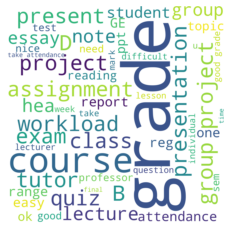

In [7]:

import matplotlib.pyplot as plt

#english_wordcloud['body2'].to_csv('txt.txt', sep='\t', index=False)

#text = open('txt.txt',encoding='utf-8').read()
text = string

wc=WordCloud(
    background_color="white", 
    max_words=50, 
    width=1000,
    repeat=True,
    height=1000,
    scale=2).generate(text)

plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

interpolation='bilinear'
wc.to_file('a.jpg')  #this  wordccloud is from all students comments

In [ ]:
#generate wordcloud from international students' comments seperately (have divided the comments artificially for analysis  )

In [29]:
international_wordcloud=pd.read_csv(r"D:\1\comments3-Sheet1.csv",encoding='utf-8')

international_wordcloud=international_wordcloud.rename(columns = {'region（mainland2，international-3）':'region'}) 

international_wordcloud['region']=international_wordcloud['region'].fillna('')

international_wordcloud['region']=international_wordcloud['region'].replace({'':"1"})

In [30]:
to_drop=['chinese course name','Unnamed: 0', 'Unnamed: 0.1']
international_wordcloud.drop(columns=to_drop,inplace=True)

In [31]:
international_wordcloud.columns

Index(['course code', 'course name', 'teacher', 'comment time', 'body', 'mark',
       'workload_num', 'year', 'semester', 'region'],
      dtype='object')

In [32]:
df=international_wordcloud[(international_wordcloud['region']=="3")]
df

,course code,course name,teacher,comment time,body,mark,workload_num,year,semester,region
0,GE2106,Philosophy and Life: A Dialogue,Hektor,2020-10-23 00:03:00,no need to participate in class discussion to ...,4.3,2,2017/18,SemA,3
3,GE1341,Life and Health,Lau? Not sure,2020-09-09 17:47:00,The easiest subject EVER EVER!!! I I only stud...,4.0,2,2018/19,SemA,3
6,GE2305,Astronomy - The Sky and Us,Gabrielle JING,2020-09-05 20:49:00,"horrible tutor, I have ever met.",NaN,0,2017/18,SemA,3
7,GE1353,"Science, Buddhism, and Life",Alex Wong,2020-09-03 23:08:00,Don’t take this course if you want a grade abo...,2.3,2,2019/20,Summer,3
8,GE2324,The Art and Science of Data,Helena,2020-09-03 14:05:00,"If you want to get A or A+, it is very hard. H...",4.0,2,2019/20,Summer,3
...,...,...,...,...,...,...,...,...,...,...
4795,GE2203,Psychology for Young Professionals,-,2013-05-11 22:26:00,quite good and hea. u only need to attend the ...,3.7,1,2011/12,Summer,3
4847,GE2203,Psychology for Young Professionals,-,2013-05-11 22:26:00,quite good and hea. u only need to attend the ...,3.7,1,2011/12,Summer,3
4848,GE4102,"Video Game: History, Industry, Society, and Cr...",Daimen?,2013-05-11 22:10:00,Easy,4.0,0,2012/13,SemA,3
4873,GE2203,Psychology for Young Professionals,-,2013-05-11 22:26:00,quite good and hea. u only need to attend the ...,3.7,1,2011/12,Summer,3


In [37]:
df['body']= df['body'].str.lower().apply(
    lambda x: " ".join(x for x in x.split() if x not in stop))


NameError: name 'stop' is not defined

In [34]:
df['body']=df['body'].apply(C_trans_to_E)
df['body']=df['body'].apply(removeChnAndCharacter)

string2=' '.join(df['body'])
string2

<ipython-input-34-5984a3dd8b17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body']=df['body'].apply(C_trans_to_E)
<ipython-input-34-5984a3dd8b17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body']=df['body'].apply(removeChnAndCharacter)


'no need to participate in class discussion to get good grades\nur arguments should be supported by explanations in ur essays and presentations\nlogic is important \nfor exams, quote Hektor\'s book if u have no clue\nHector is funny and charismaticand think! The easiest subject EVER EVER!!! I I only studied biology at f.3, but I could still catch up the lessons easily. Highly recommend this subject to all of you guys horrible tutor, I have ever met. Don’t take this course if you want a grade above a B. If you want to get A or A+, it is very hard. Helena will take all your scores in this course into consideration. This summer, you may fail to get an A if your score of final is less than 80, even your total score is high enough. You will also fail to get an A+ if your score of final is only a bit higher than 80 while your total score is even higher than 90, which means your score may be even higher than some students who get an A+. That is to say, Helena prefers the final. She tends to p

In [39]:
df.to_csv('internaltional.csv')

In [40]:
df.to_excel('internaltional.xls')

In [35]:
# collect comments for sentiment anaysis,not necessary

df['body']=df['body'].replace('\n','',regex=True)
#df = df.replace('\n','', regex=True)
#df_emo=english_wordcloud['body2'].to_frame()
df['body'].to_csv('emo.txt',index = False)

<ipython-input-35-d4fe1822fec9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body']=df['body'].replace('\n','',regex=True)


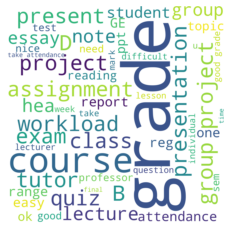

In [46]:
text = string2

wc2=WordCloud(
    background_color="white", 
    max_words=50, 
    width=1000,
    repeat=True,
    height=1000,
    scale=2).generate(text)

plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

interpolation='bilinear'
wc2.to_file('b.jpg') 

In [51]:
df['body'].to_csv('filepath.txt',index = False)